*Student performance indicator*

In [111]:
# Importing essential libraries:
# - numpy for numerical computations
# - pandas for data manipulation and analysis
# - seaborn for data visualization (provides attractive statistical plots)
# - matplotlib.pyplot for creating static, interactive, and animated visualizations
# The `%matplotlib inline` magic command is used to display plots directly in Jupyter Notebook.
# Suppressing warnings with `warnings.filterwarnings('ignore')` to avoid unnecessary warning messages in the output.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [113]:
# Reading the dataset 'stud.csv' into a pandas DataFrame named 'df' using the read_csv method.
# The file is assumed to be located in the 'data' directory relative to the current working directory.


In [2]:
df = pd.read_csv("data/stud.csv")

In [115]:
# Displaying the first 5 rows of the DataFrame 'df' using the head() method.
# This is useful for quickly inspecting the structure and contents of the dataset.


In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Retrieving the dimensions of the DataFrame 'df' using the shape attribute.
# The output is a tuple (number of rows, number of columns), providing an overview of the dataset's size.


df.shape

(1000, 8)

In [5]:
# Checking for missing values in the DataFrame 'df' using the isnull() method combined with sum().
# This calculates the total number of missing values for each column, helping identify any data gaps.

df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
# Checking for duplicate rows in the DataFrame 'df' using the duplicated() method combined with sum().
# This counts the total number of duplicate rows, useful for cleaning the dataset.

df.duplicated().sum()

0

In [7]:
# Displaying a concise summary of the DataFrame 'df' using the info() method.
# This includes information about the number of rows, columns, data types, and non-null values for each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#cheaking the number of unique values of column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# Generating descriptive statistics for the numeric columns in the DataFrame 'df' using the describe() method.
# This includes measures like count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.
# Helps in understanding the distribution and summary of numerical data.
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# Displaying the unique categories (distinct values) for specific categorical columns in the DataFrame 'df':
# - For the 'gender' column: Using the unique() method to print all distinct values in the 'gender' variable.
print("Categories in 'gender' variable: ", end="")
print(df['gender'].unique())

# - For the 'race_ethnicity' column: Printing unique categories for the 'race_ethnicity' variable.
print("Categories in 'race_ethnicity' variable: ", end="")
print(df['race_ethnicity'].unique())

# - For the 'parental_level_of_education' column: Displaying unique values to understand the distinct educational levels of parents.
print("Categories in 'parental level of education' variable:", end=" ")
print(df['parental_level_of_education'].unique())

# - For the 'lunch' column: Checking unique categories in the 'lunch' variable.
print("Categories in 'lunch' variable:     ", end=" ")
print(df['lunch'].unique())

# - For the 'test_preparation_course' column: Listing unique values in the 'test_preparation_course' variable.
print("Categories in 'test preparation course' variable:     ", end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [11]:
# Separating numerical and categorical features in the DataFrame 'df':

# Creating a list of numerical features by checking if the data type of each column is not 'object' (non-categorical).
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'o']

# Creating a list of categorical features by checking if the data type of each column is 'object' (categorical).
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'o']

# Printing the number of numerical features along with their names.
print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))

# Printing the number of categorical features along with their names.
print("\nWe have {} categorical features: {}".format(len(categorical_features), categorical_features))


We have 8 numerical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']

We have 0 categorical features: []


ADDING COLUMNS FOR "TOTAL SCORE" AND "AVG"

In [12]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
# Counting the number of students who scored full marks (100) in each subject (Math, Writing, Reading).

# Filtering the DataFrame 'df' for students who scored 100 in 'reading_score' and counting the number of occurrences in the 'average' column.
reading_full = df[df['reading_score'] == 100]['average'].count()

# Filtering the DataFrame 'df' for students who scored 100 in 'writing_score' and counting the number of occurrences in the 'average' column.
writing_full = df[df['writing_score'] == 100]['average'].count()

# Filtering the DataFrame 'df' for students who scored 100 in 'math_score' and counting the number of occurrences in the 'average' column.
math_full = df[df['math_score'] == 100]['average'].count()

# Printing the number of students with full marks in each subject (Math, Writing, and Reading).
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
# Counting the number of students who scored less than or equal to 20 marks in each subject (Math, Writing, Reading).

# Filtering the DataFrame 'df' for students who scored 20 or less in 'reading_score' and counting the number of occurrences in the 'average' column.
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()

# Filtering the DataFrame 'df' for students who scored 20 or less in 'writing_score' and counting the number of occurrences in the 'average' column.
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()

# Filtering the DataFrame 'df' for students who scored 20 or less in 'math_score' and counting the number of occurrences in the 'average' column.
math_less_20 = df[df['math_score'] <= 20]['average'].count()

# Printing the number of students with less than or equal to 20 marks in each subject (Math, Writing, and Reading).
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights

From above values we get students have performed the worst in Maths
Best performance is in reading section

Histogram & KDE

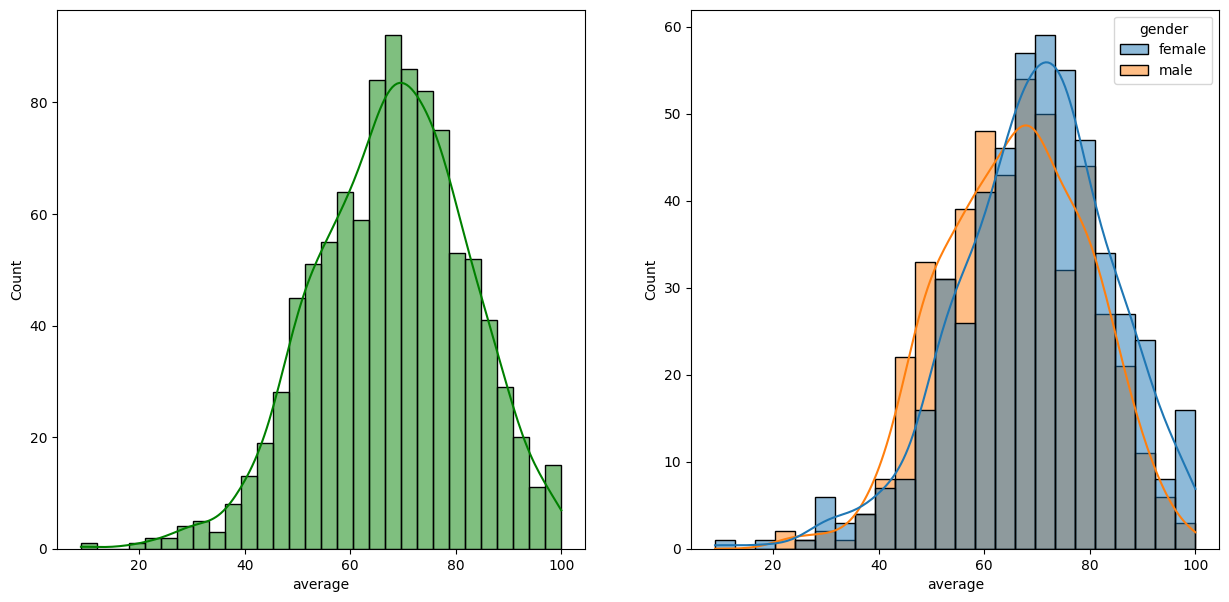

In [15]:
# Creating a figure with two subplots to visualize the distribution of the 'average' score in different ways.

# Setting up the subplots: 1 row, 2 columns, with a figure size of (15, 7).
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot (on the left):
# Plotting a histogram of the 'average' scores with 30 bins and adding a kernel density estimate (KDE) curve. 
# The color of the plot is set to green.
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')

# Second subplot (on the right):
# Plotting a histogram of the 'average' scores with a KDE curve, and using 'gender' as the hue to separate the data.
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')

# Displaying the plots.
plt.show()


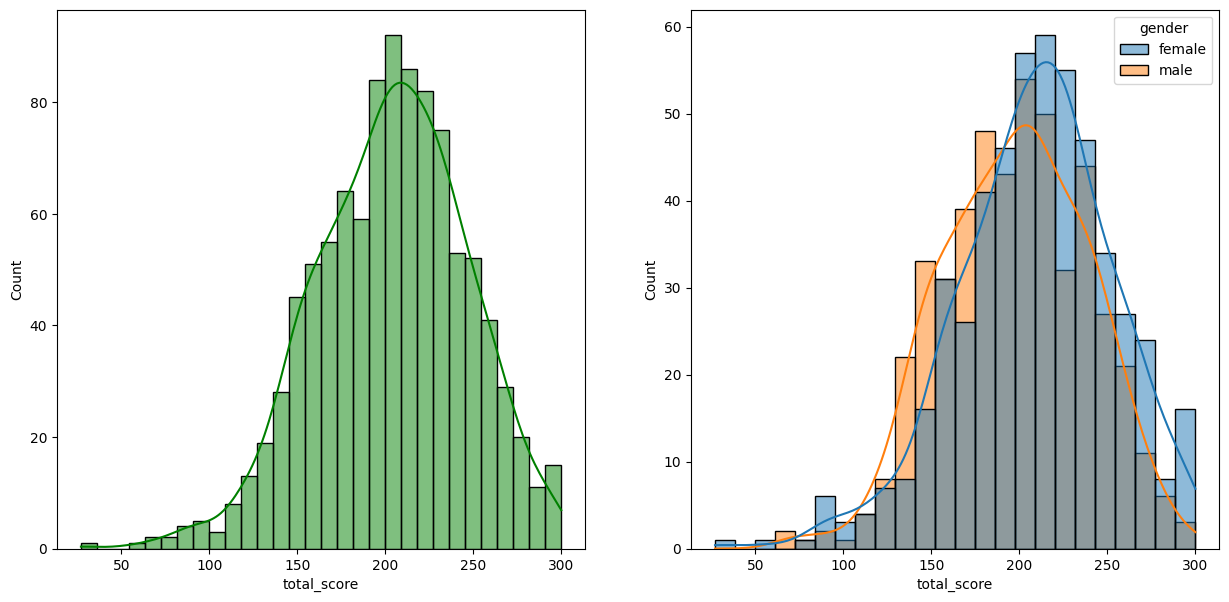

In [16]:
# Creating a figure with two subplots to visualize the distribution of the 'total_score' in different ways.

# Setting up the subplots: 1 row, 2 columns, with a figure size of (15, 7).
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot (on the left):
# Plotting a histogram of the 'total_score' with 30 bins and adding a kernel density estimate (KDE) curve. 
# The color of the plot is set to green.
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')

# Second subplot (on the right):
# Plotting a histogram of the 'total_score' with a KDE curve, and using 'gender' as the hue to separate the data.
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')

# Displaying the plots.
plt.show()


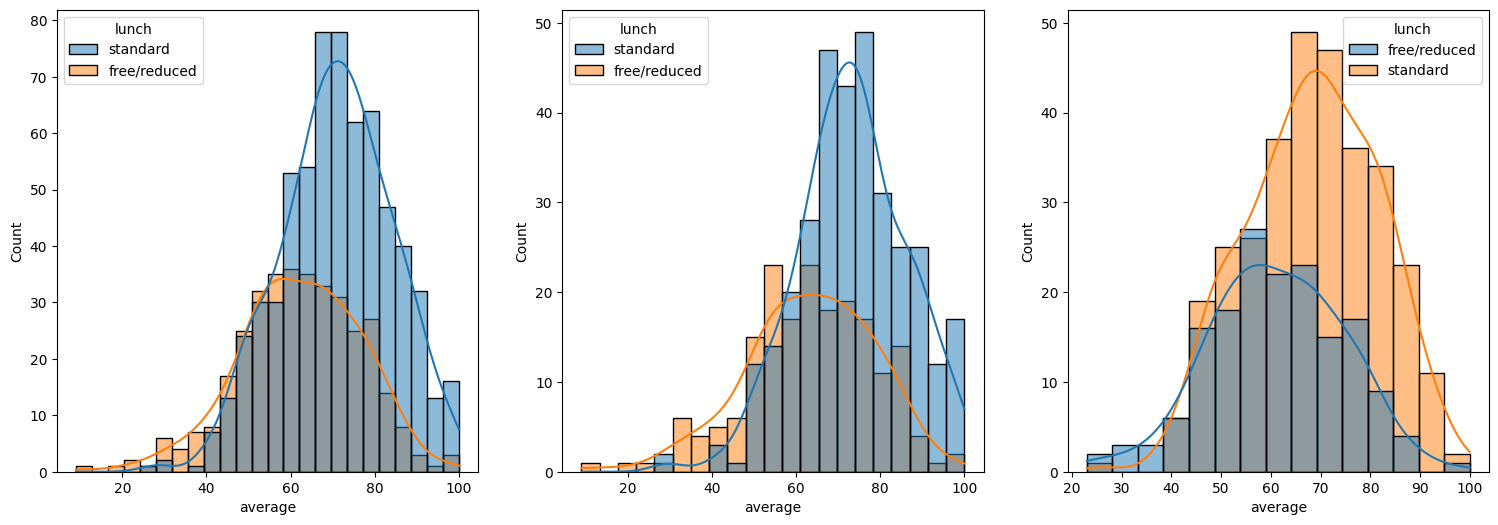

In [17]:
# Creating a figure with three subplots to visualize the distribution of 'average' scores with respect to 'lunch' and 'gender'.

# Setting up the subplots: 1 row, 3 columns, with a figure size of (25, 6).
plt.subplots(1, 3, figsize=(25, 6))

# First subplot (on the left):
# Plotting the distribution of 'average' scores with a KDE curve, separated by 'lunch' categories.
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

# Second subplot (in the middle):
# Plotting the distribution of 'average' scores for female students, with a KDE curve, separated by 'lunch' categories.
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')

# Third subplot (on the right):
# Plotting the distribution of 'average' scores for male students, with a KDE curve, separated by 'lunch' categories.
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')

# Displaying the plots.
plt.show()



Insights

Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams be it a male or a female

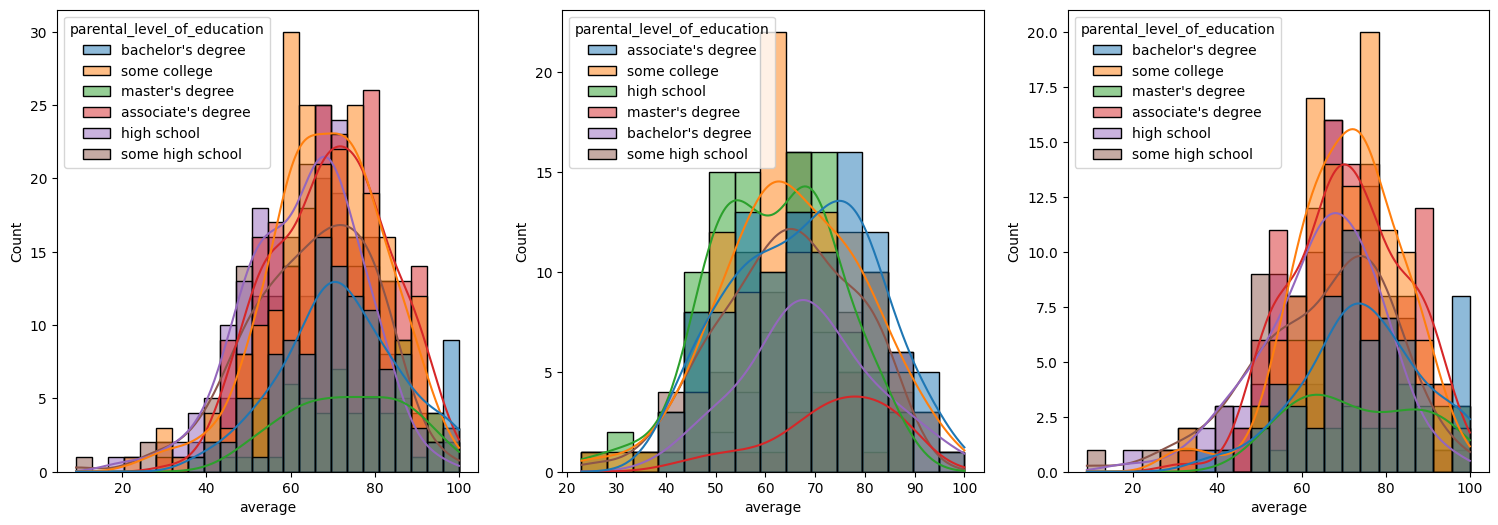

In [18]:
# Creating a figure with three subplots to visualize the distribution of the 'average' score based on 'parental_level_of_education' and gender.

# Setting up the subplots: 1 row, 3 columns, with a figure size of (25, 6).
plt.subplots(1, 3, figsize=(25, 6))

# First subplot (on the left):
# Plotting the distribution of the 'average' score with a KDE curve, using 'parental_level_of_education' as the hue to distinguish between different education levels.
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')

# Second subplot (in the middle):
# Filtering the data for male students and plotting the distribution of the 'average' score with a KDE curve, using 'parental_level_of_education' as the hue.
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education')

# Third subplot (on the right):
# Filtering the data for female students and plotting the distribution of the 'average' score with a KDE curve, using 'parental_level_of_education' as the hue.
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')

# Displaying the plots.
plt.show()



Insights

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

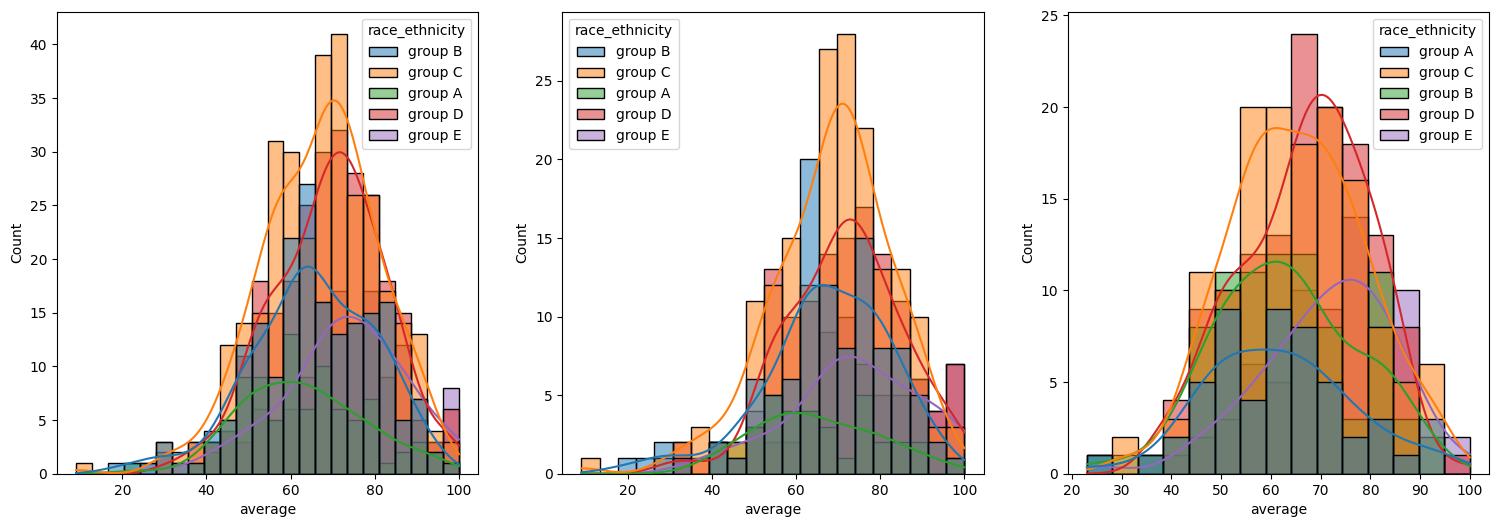

In [19]:
# Creating a figure with three subplots to visualize the distribution of the 'average' score based on 'race_ethnicity' and gender.

# Setting up the subplots: 1 row, 3 columns, with a figure size of (25, 6).
plt.subplots(1, 3, figsize=(25, 6))

# First subplot (on the left):
# Plotting the distribution of the 'average' score with a KDE curve, using 'race_ethnicity' as the hue to distinguish between different race/ethnic groups.
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')

# Second subplot (in the middle):
# Filtering the data for female students and plotting the distribution of the 'average' score with a KDE curve, using 'race_ethnicity' as the hue.
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race_ethnicity')

# Third subplot (on the right):
# Filtering the data for male students and plotting the distribution of the 'average' score with a KDE curve, using 'race_ethnicity' as the hue.
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity')

# Displaying the plots.
plt.show()



Insights

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

Maximumum score of students in all three subjects

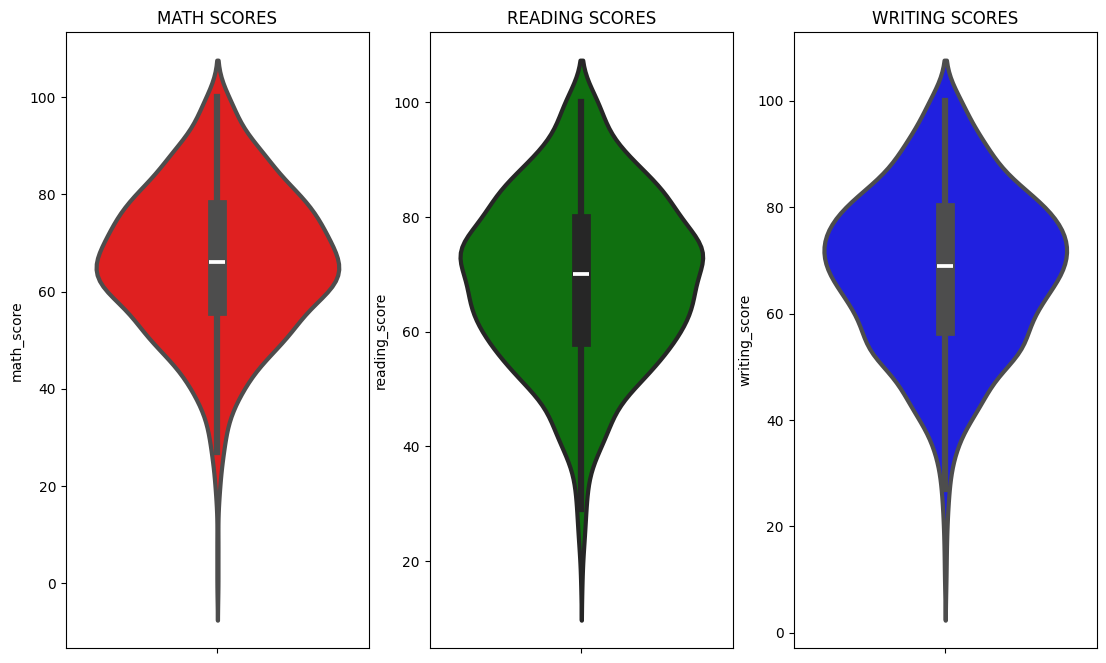

In [20]:
# Creating a figure with three subplots to visualize the distribution of scores (Math, Reading, and Writing) using violin plots.

# Setting up the figure size to (18, 8) for better visualization.
plt.figure(figsize=(18, 8))

# First subplot (on the left):
# Plotting a violin plot for the 'math_score' column, using the color red and setting the line width to 3.
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')  # Adding a title for the math scores plot.
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

# Second subplot (in the middle):
# Plotting a violin plot for the 'reading_score' column, using the color green and setting the line width to 3.
plt.subplot(1, 4, 2)
plt.title('READING SCORES')  # Adding a title for the reading scores plot.
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

# Third subplot (on the right):
# Plotting a violin plot for the 'writing_score' column, using the color blue and setting the line width to 3.
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')  # Adding a title for the writing scores plot.
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

# Displaying the plots.
plt.show()


Insights

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

Multivariate anlalysis using pieplot


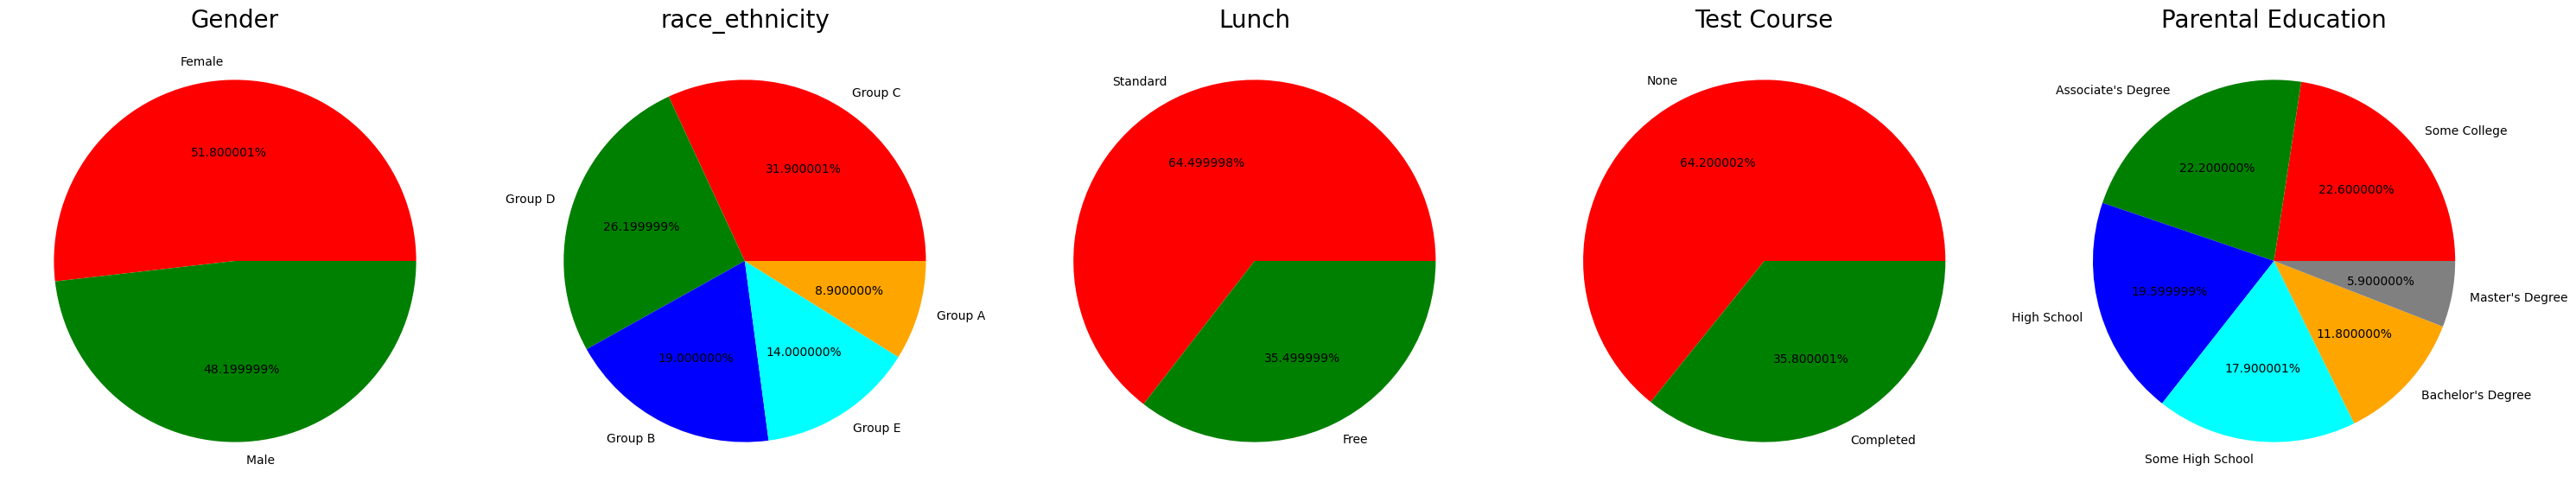

In [21]:
# Setting the figure size to (30, 12) for a larger visualization of the pie charts.
plt.rcParams['figure.figsize'] = (30, 12)

# First subplot (Gender distribution):
# Creating a pie chart for the 'gender' column with 'Female' and 'Male' categories.
size = df['gender'].value_counts()  # Getting the counts of each gender.
labels = 'Female', 'Male  '  # Defining the labels for the pie chart.
color = ['red', 'green']  # Setting colors for each category.
plt.subplot(1, 5, 1)
plt.pie(size, colors=color, labels=labels, autopct='%2f%%')  # Creating the pie chart with percentage format.
plt.title('Gender', fontsize=20)  # Adding a title with a font size of 20.
plt.axis('off')  # Hiding the axis.

# Second subplot (Race/Ethnicity distribution):
# Creating a pie chart for the 'race_ethnicity' column with categories like Group A, Group B, etc.
size = df['race_ethnicity'].value_counts()  # Getting the counts of each race/ethnicity group.
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'  # Defining the labels.
color = ['red', 'green', 'blue', 'cyan', 'orange']  # Setting colors for each category.
plt.subplot(1, 5, 2)
plt.pie(size, colors=color, labels=labels, autopct='%2f%%')  # Creating the pie chart.
plt.title('race_ethnicity', fontsize=20)  # Adding a title.
plt.axis('off')  # Hiding the axis.

# Third subplot (Lunch distribution):
# Creating a pie chart for the 'lunch' column with 'Standard' and 'Free' categories.
size = df['lunch'].value_counts()  # Getting the counts for 'lunch' categories.
labels = 'Standard', 'Free'  # Defining the labels.
color = ['red', 'green']  # Setting colors.
plt.subplot(1, 5, 3)
plt.pie(size, colors=color, labels=labels, autopct='%2f%%')  # Creating the pie chart.
plt.title('Lunch', fontsize=20)  # Adding a title.
plt.axis('off')  # Hiding the axis.

# Fourth subplot (Test Preparation Course distribution):
# Creating a pie chart for the 'test_preparation_course' column with 'None' and 'Completed' categories.
size = df['test_preparation_course'].value_counts()  # Getting the counts of each category.
labels = 'None', 'Completed'  # Defining the labels.
color = ['red', 'green']  # Setting colors.
plt.subplot(1, 5, 4)
plt.pie(size, colors=color, labels=labels, autopct='%2f%%')  # Creating the pie chart.
plt.title('Test Course', fontsize=20)  # Adding a title.
plt.axis('off')  # Hiding the axis.

# Fifth subplot (Parental Education distribution):
# Creating a pie chart for the 'parental_level_of_education' column with multiple education levels.
size = df['parental_level_of_education'].value_counts()  # Getting the counts of each education level.
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"  # Defining the labels.
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']  # Setting colors.
plt.subplot(1, 5, 5)
plt.pie(size, colors=color, labels=labels, autopct='%2f%%')  # Creating the pie chart.
plt.title('Parental Education', fontsize=20)  # Adding a title.
plt.axis('off')  # Hiding the axis.

# Adjusting the layout to avoid overlapping and adding gridlines.
plt.tight_layout()
plt.grid()

# Displaying the pie charts.
plt.show()



Insights

Number of Male and Female students is almost equal
Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

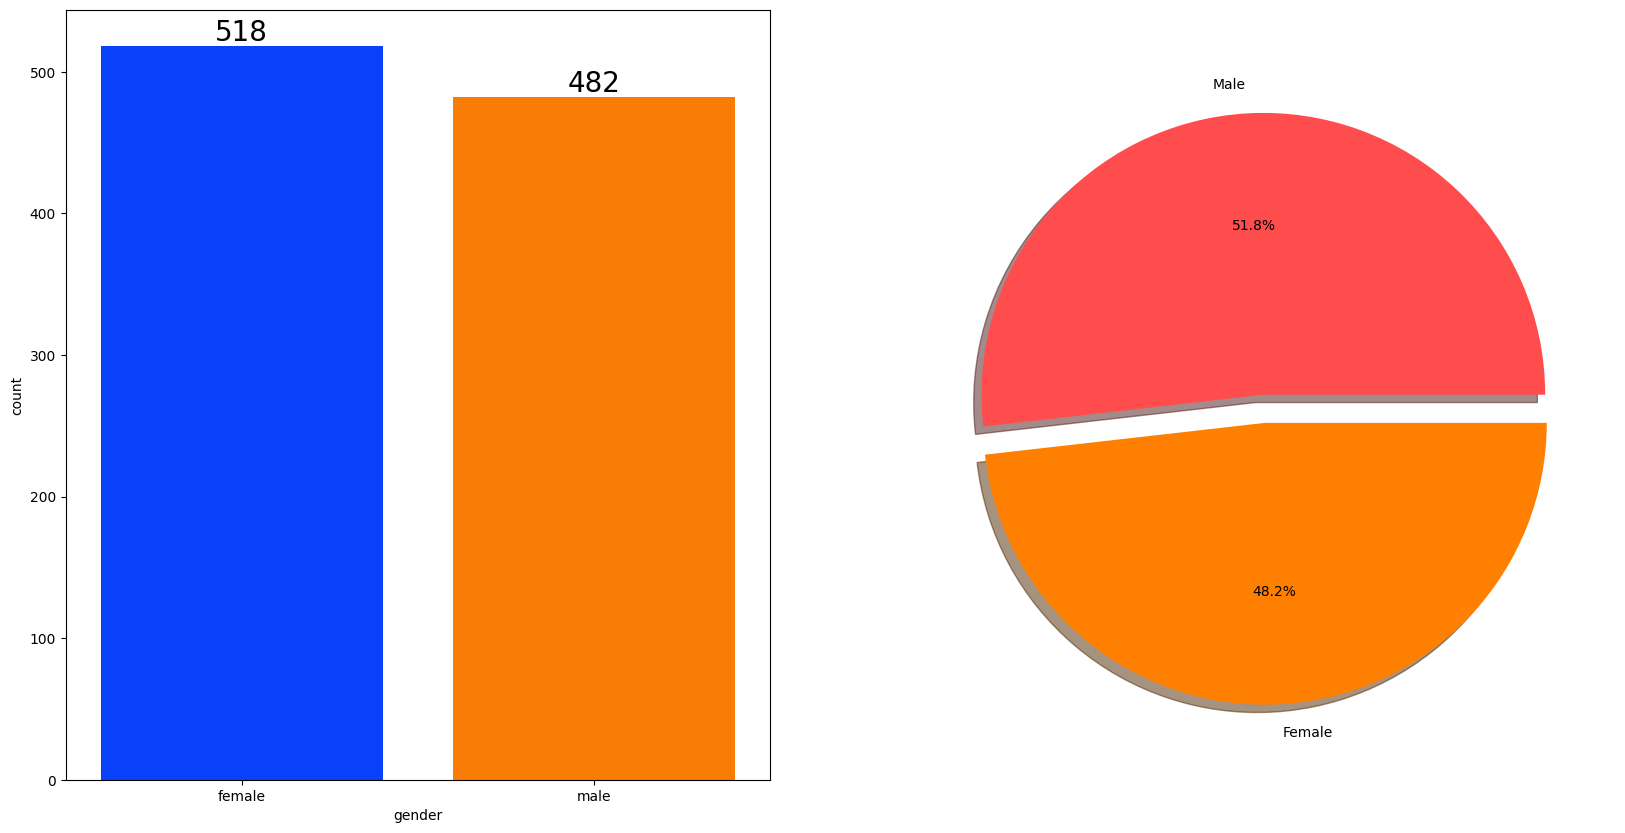

In [22]:
# Creating a figure with two subplots (1 row and 2 columns), with a larger figure size of (20, 10).
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# First subplot (Gender distribution as a bar plot):
# Using a countplot to visualize the distribution of the 'gender' column in the dataset.
# Using a bright color palette, and setting saturation to 0.95 for a more vibrant color.
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)

# Adding labels on top of the bars with the count values. 
# Iterating through all containers (bars in the countplot) and adding a label with black color and size 20.
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Second subplot (Gender distribution as a pie chart):
# Creating a pie chart showing the percentage of 'Male' and 'Female' in the 'gender' column.
# Exploding the 'Female' slice slightly for emphasis, and adding shadow to the pie chart for a 3D effect.
# Using a custom color scheme for the slices.
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])

# Displaying both the bar plot and pie chart.
plt.show()



Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)


BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


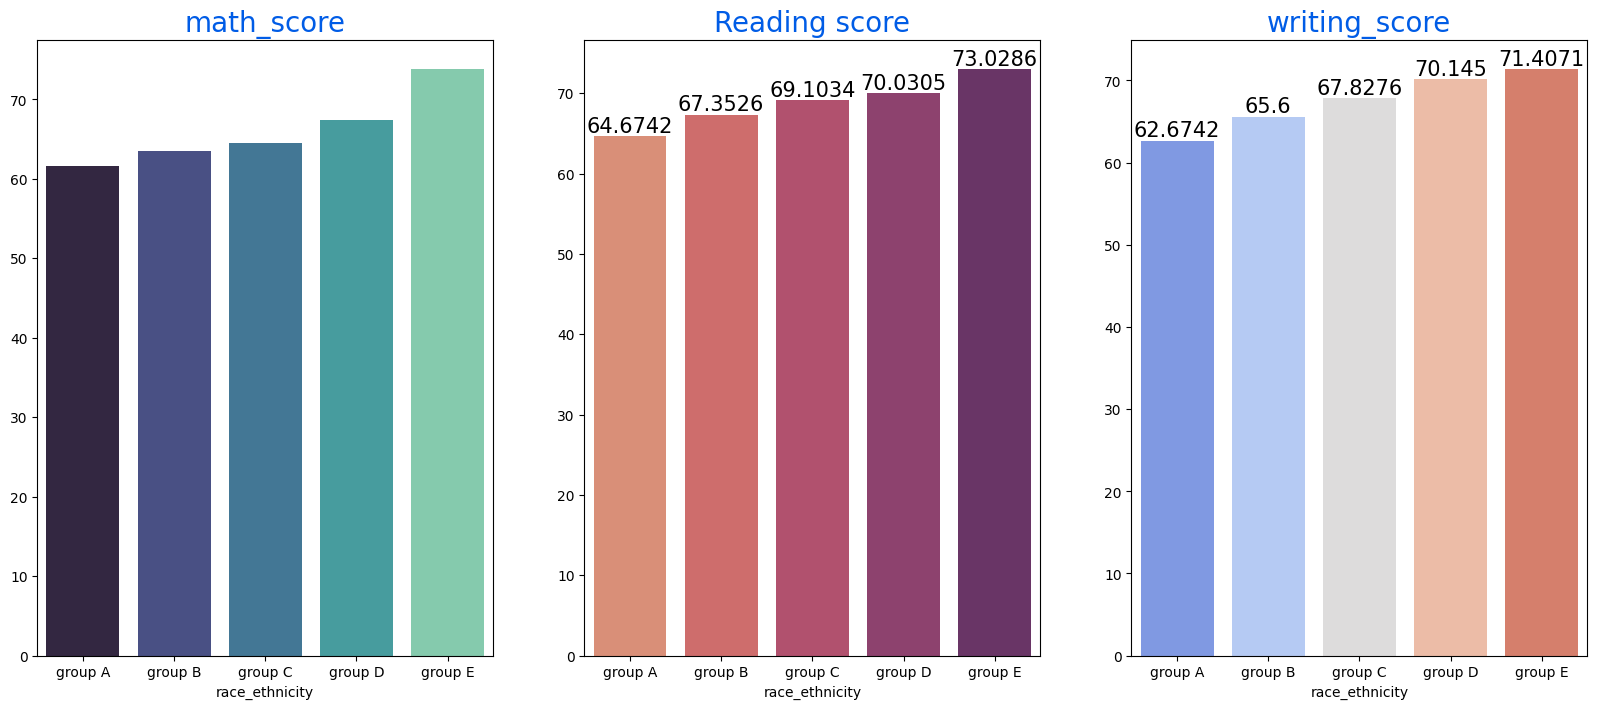

In [24]:
# Grouping the data by 'race_ethnicity' to perform analysis on different race/ethnicity groups.
Group_data2 = df.groupby('race_ethnicity')

# Creating a figure with 3 subplots (1 row, 3 columns), with a figure size of (20, 8).
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# First subplot (Math scores by race/ethnicity):
# Using a barplot to show the average 'math_score' for each 'race_ethnicity' group.
# The color palette 'mako' is used for the bars.
sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, palette='mako', ax=ax[0])

# Adding a title to the first subplot, with a specific color and font size.
ax[0].set_title('math_score', color='#005ce6', size=20)

# Adding labels on top of the bars (mean math scores) with black color and font size 15.
for container in ax[0].collections:
    ax[0].bar_label(container, color='black', size=15)

# Second subplot (Reading scores by race/ethnicity):
# Using a barplot to show the average 'reading_score' for each 'race_ethnicity' group.
# The color palette 'flare' is used for the bars.
sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])

# Adding a title to the second subplot, with a specific color and font size.
ax[1].set_title('Reading score', color='#005ce6', size=20)

# Adding labels on top of the bars (mean reading scores) with black color and font size 15.
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Third subplot (Writing scores by race/ethnicity):
# Using a barplot to show the average 'writing_score' for each 'race_ethnicity' group.
# The color palette 'coolwarm' is used for the bars.
sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])

# Adding a title to the third subplot, with a specific color and font size.
ax[2].set_title('writing_score', color='#005ce6', size=20)

# Adding labels on top of the bars (mean writing scores) with black color and font size 15.
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

# Displaying the bar plots for math, reading, and writing scores by race/ethnicity.
plt.show()


Insights

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

PARENTAL LEVEL OF EDUCATION COLUMN

What is educational background of student's parent ?

Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

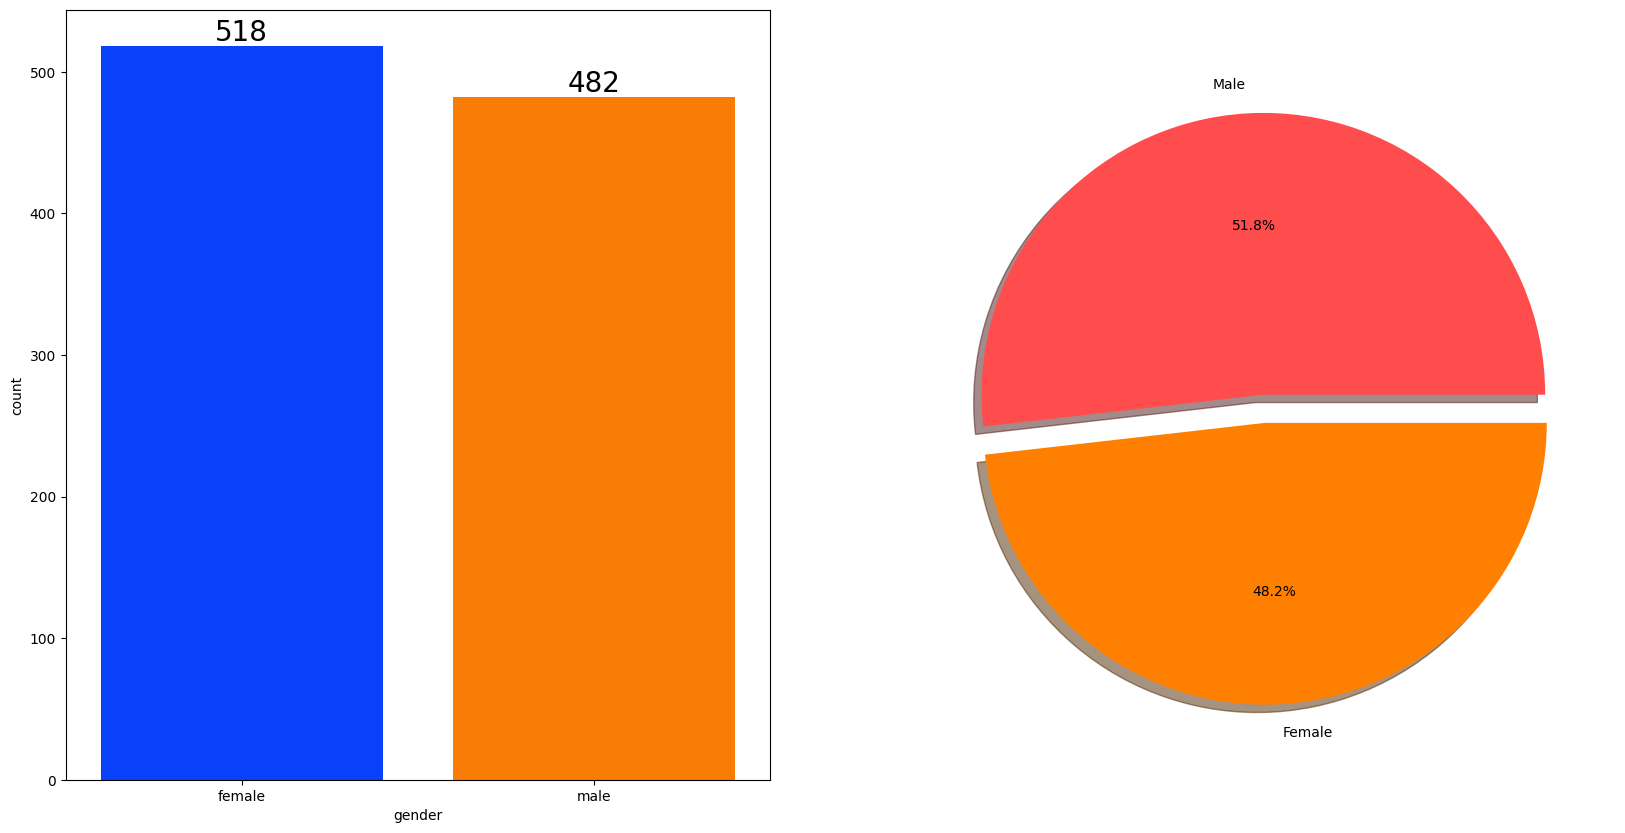

In [25]:
# Create a figure with 2 subplots arranged in a row
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Create a count plot for the 'gender' column in the first subplot
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)

# Add value labels to each bar in the count plot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Create a pie chart for gender distribution in the second subplot
plt.pie(
    x=df['gender'].value_counts(),  # Data for the pie chart
    labels=['Male', 'Female'],     # Labels for the pie chart slices
    explode=[0, 0.1],              # Offset the second slice slightly for emphasis
    autopct='%1.1f%%',             # Show percentage values on the slices
    shadow=True,                   # Add shadow for a 3D effect
    colors=['#ff4d4d', '#ff8000']  # Set custom colors for the slices
)

# Display the combined plots
plt.show()


Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)


BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Group by 'gender' and calculate the mean for numeric columns
gender_group = numeric_df.groupby(df['gender']).mean()

# Display the result
print(gender_group)



        math_score  reading_score  writing_score  total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


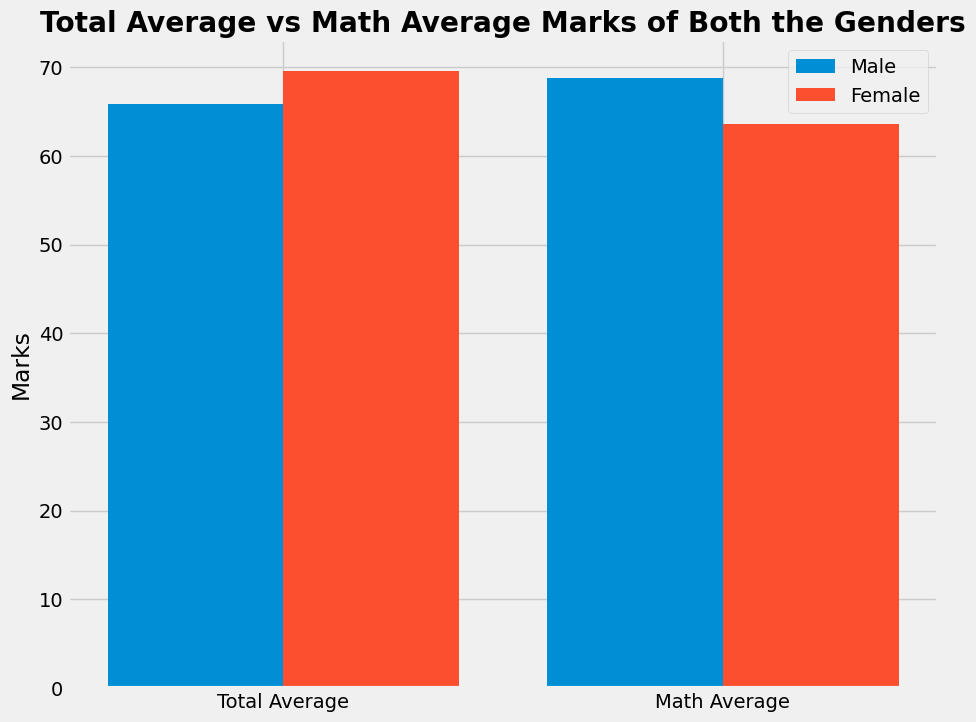

In [140]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))  # Set the figure size for the plot

X = ['Total Average', 'Math Average']  # Labels for the categories on the x-axis

# Scores for female and male students, extracted from the gender_group DataFrame
female_scores = [gender_group['average'][0], gender_group['math_score'][0]]  # Female scores
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]    # Male scores

X_axis = np.arange(len(X))  # Create the positions for the x-axis categories
  
# Plot the bars for male scores, offset slightly to the left
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')

# Plot the bars for female scores, offset slightly to the right
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')
  
plt.xticks(X_axis, X)  # Set the category labels on the x-axis
plt.ylabel("Marks")  # Set the y-axis label
plt.title("Total Average vs Math Average Marks of Both the Genders", fontweight='bold')  # Title of the plot
plt.legend()  # Display the legend to differentiate between male and female scores
plt.show()  # Display the plot


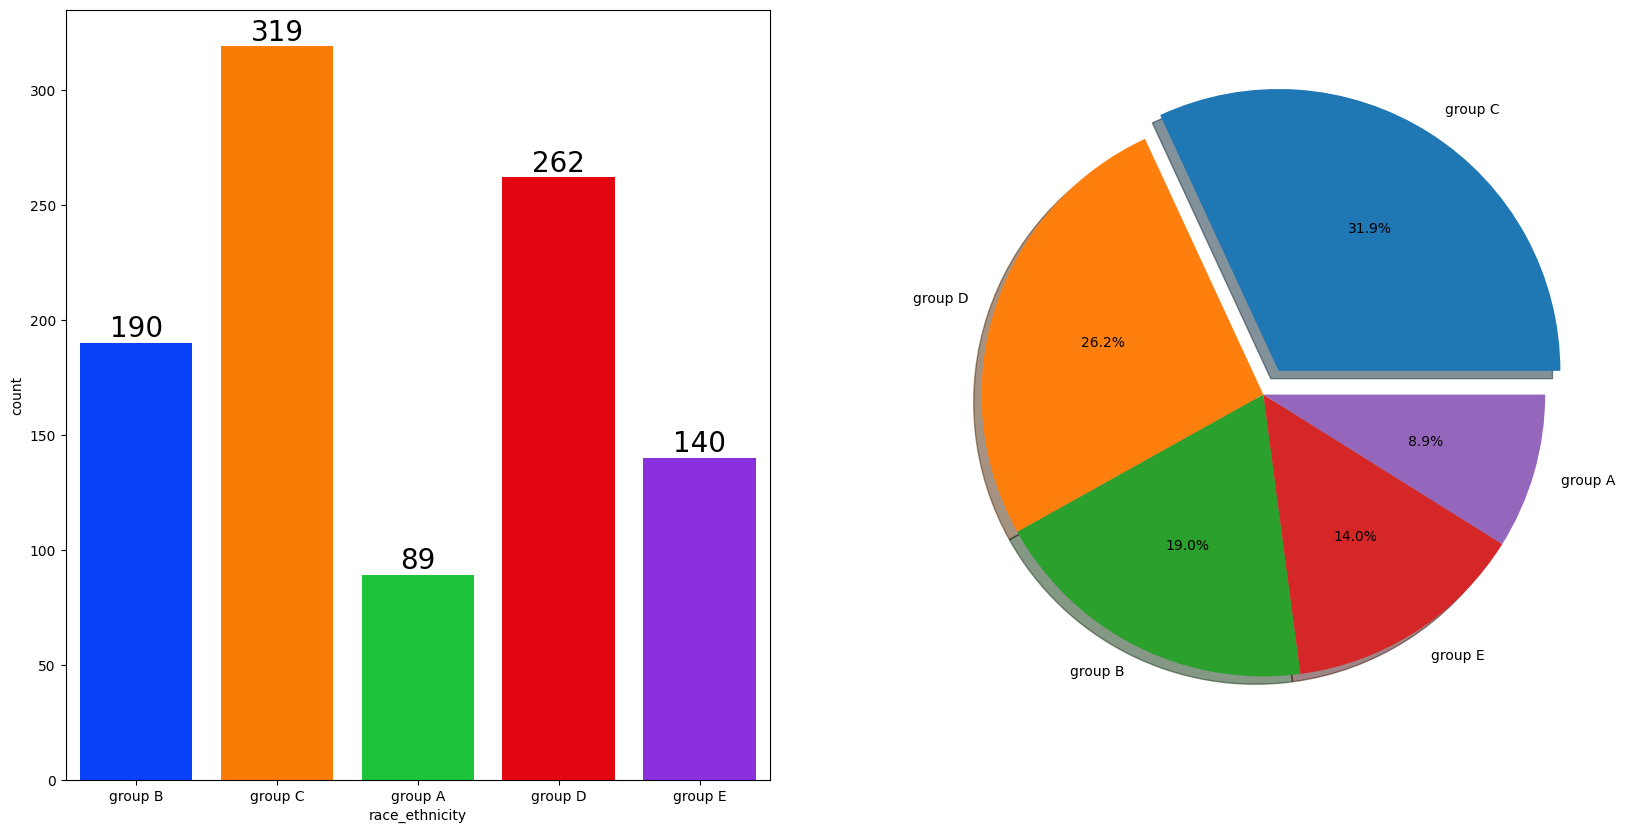

In [27]:
# Create a figure with 1 row and 2 columns of subplots, with a size of 20x10
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Create a count plot for the 'race_ethnicity' column on the first subplot
sns.countplot(
    x=df['race_ethnicity'],  # Data for the x-axis
    data=df,                 # DataFrame
    palette='bright',        # Color palette
    ax=ax[0],                # Subplot to plot on
    saturation=0.95          # Bar color intensity
)

# Add value labels to each bar in the count plot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Create a pie chart on the second subplot to show the distribution of 'race_ethnicity'
plt.pie(
    x=df['race_ethnicity'].value_counts(),       # Values for the pie chart
    labels=df['race_ethnicity'].value_counts().index,  # Labels for the slices
    explode=[0.1, 0, 0, 0, 0],                   # Offset the first slice for emphasis
    autopct='%1.1f%%',                           # Show percentage values on the slices
    shadow=True                                  # Add shadow for a 3D effect
)

# Display both plots
plt.show()


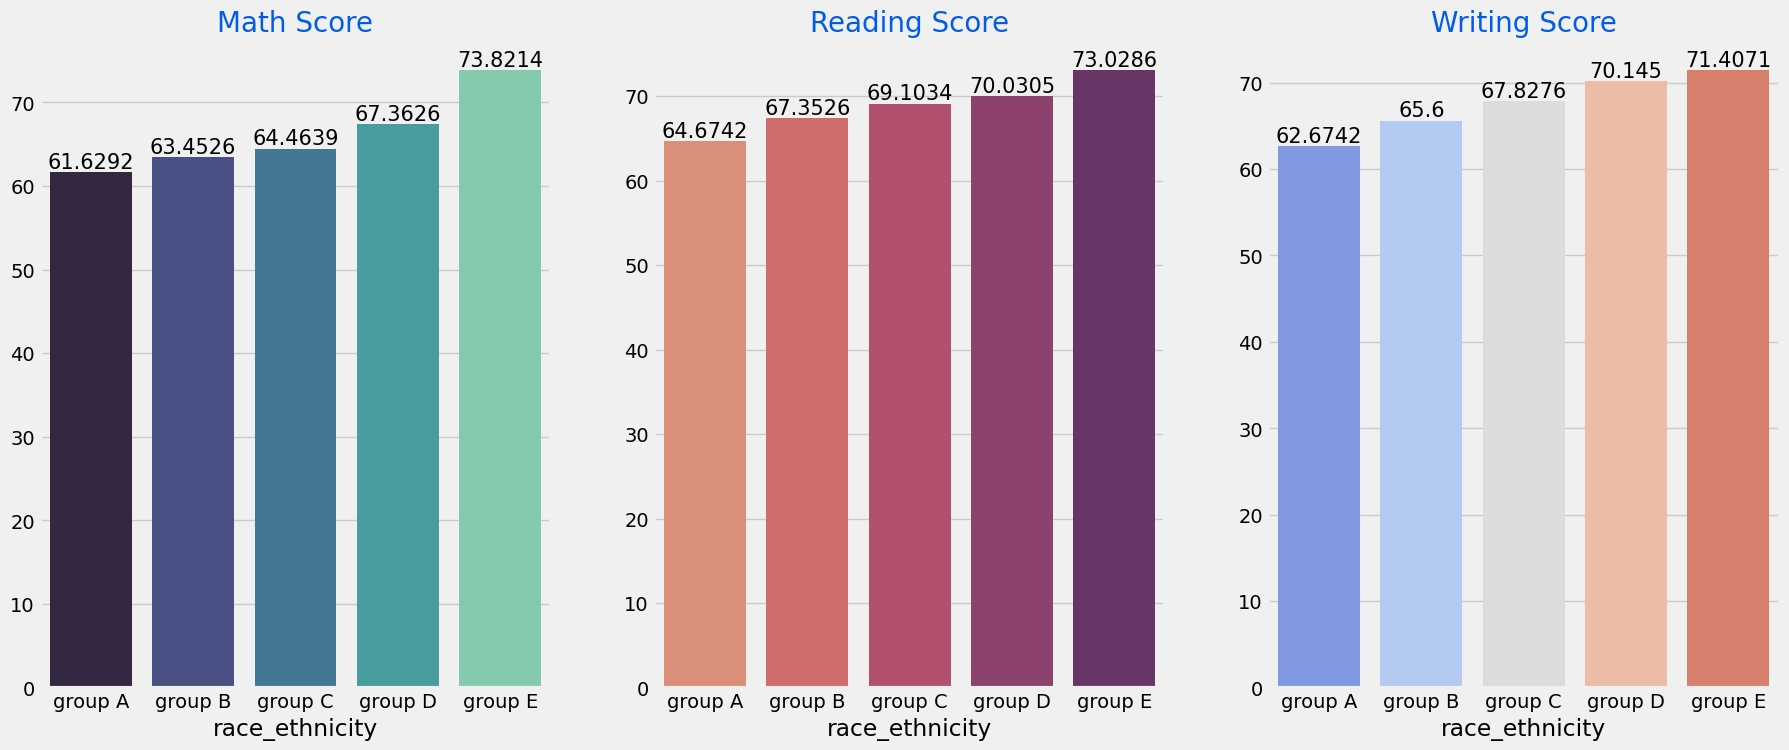

In [142]:
# Group the data by 'race_ethnicity'
Group_data2 = df.groupby('race_ethnicity')

# Create a figure with 3 subplots arranged in 1 row and 3 columns
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot the mean math scores for each 'race_ethnicity' group in the first subplot
sns.barplot(
    x=Group_data2['math_score'].mean().index,      # Categories (race_ethnicity)
    y=Group_data2['math_score'].mean().values,    # Mean math scores
    palette='mako',                               # Color palette
    ax=ax[0]                                      # Subplot to plot on
)
ax[0].set_title('Math Score', color='#005ce6', size=20)  # Set the title for the first plot

# Add value labels above each bar in the math score plot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot the mean reading scores for each 'race_ethnicity' group in the second subplot
sns.barplot(
    x=Group_data2['reading_score'].mean().index,   # Categories (race_ethnicity)
    y=Group_data2['reading_score'].mean().values, # Mean reading scores
    palette='flare',                              # Color palette
    ax=ax[1]                                      # Subplot to plot on
)
ax[1].set_title('Reading Score', color='#005ce6', size=20)  # Set the title for the second plot

# Add value labels above each bar in the reading score plot
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plot the mean writing scores for each 'race_ethnicity' group in the third subplot
sns.barplot(
    x=Group_data2['writing_score'].mean().index,   # Categories (race_ethnicity)
    y=Group_data2['writing_score'].mean().values, # Mean writing scores
    palette='coolwarm',                           # Color palette
    ax=ax[2]                                      # Subplot to plot on
)
ax[2].set_title('Writing Score', color='#005ce6', size=20)  # Set the title for the third plot

# Add value labels above each bar in the writing score plot
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

# Display the plots
plt.show()


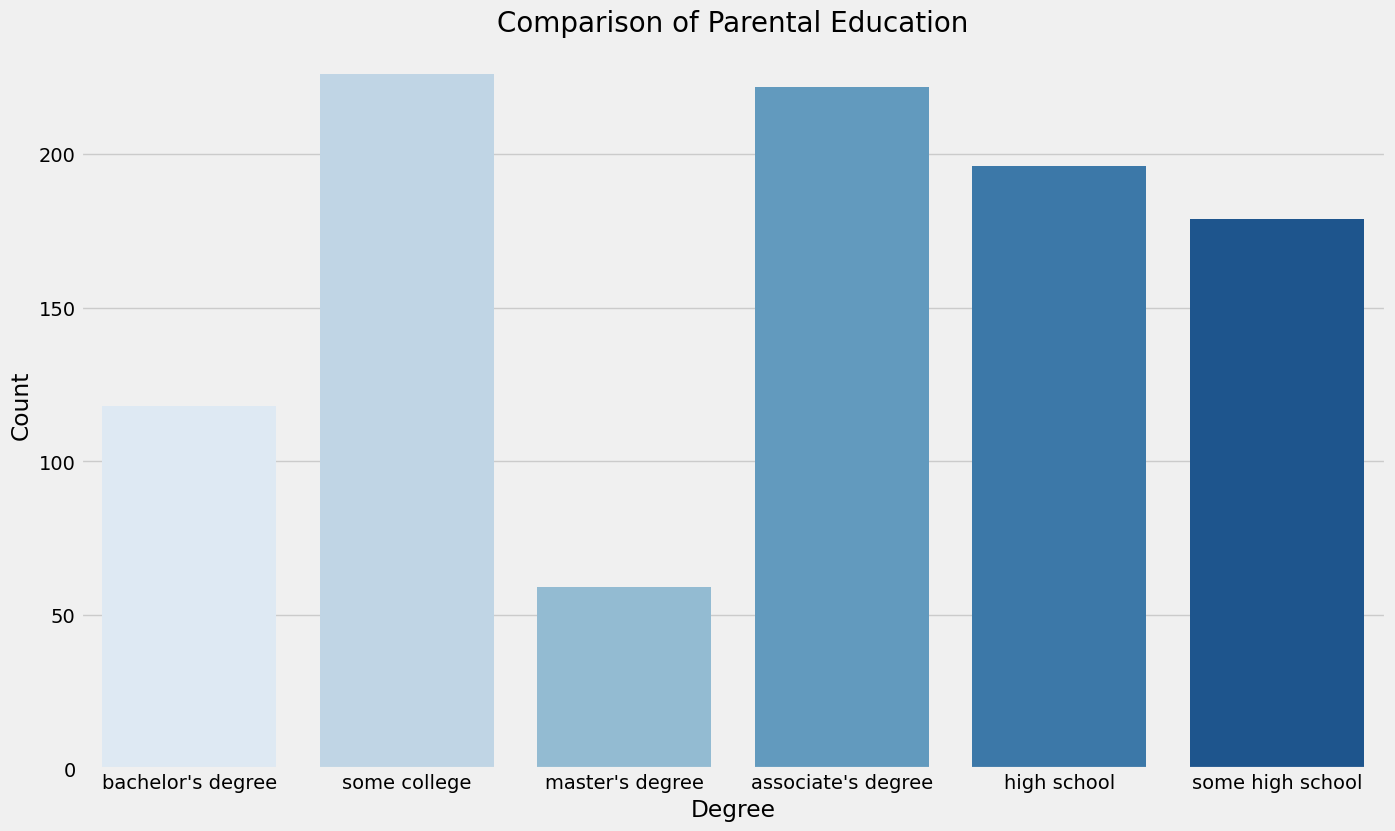

In [28]:
# Set the default figure size for the plot
plt.rcParams['figure.figsize'] = (15, 9)

# Use the 'fivethirtyeight' style for a clean and professional look
plt.style.use('fivethirtyeight')

# Create a count plot for the 'parental_level_of_education' column
sns.countplot(
    x=df['parental_level_of_education'],  # Data for the x-axis
    palette='Blues'                      # Color palette for the bars
)

# Set the title of the plot with specific font weight and size
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)

# Label the x-axis to specify what the categories represent
plt.xlabel('Degree')

# Label the y-axis to indicate the count of occurrences
plt.ylabel('Count')

# Display the plot
plt.show()


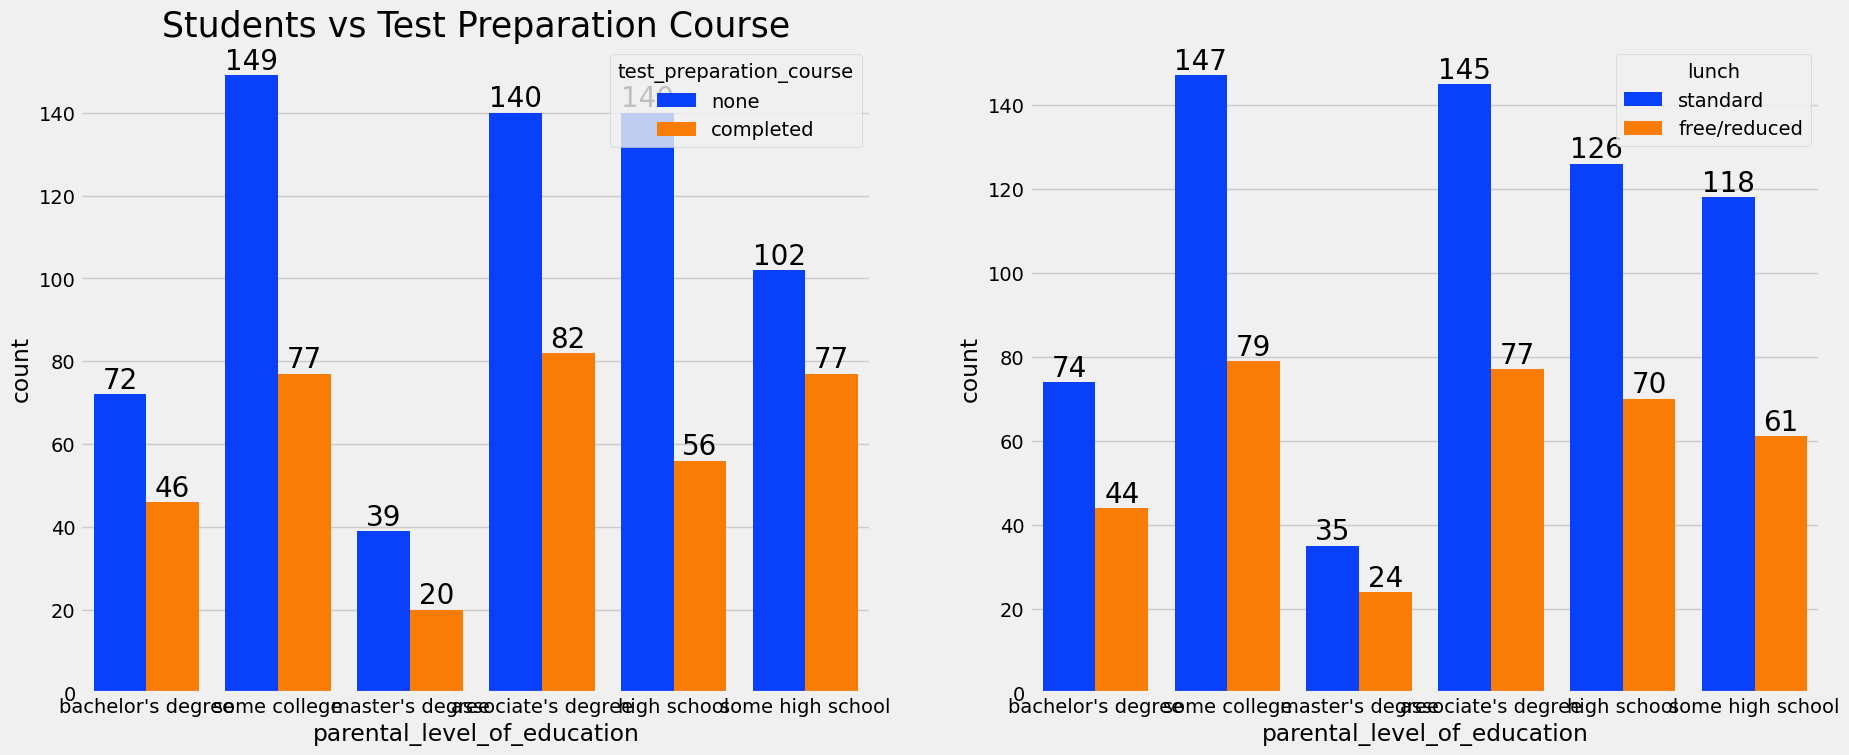

In [29]:
# Create a figure with 1 row and 2 columns of subplots, with a figure size of 20x8
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Create the first count plot to compare 'parental_level_of_education' with 'test_preparation_course'
sns.countplot(
    x=df['parental_level_of_education'],  # Data for the x-axis (parental education level)
    data=df,                              # DataFrame containing the data
    palette='bright',                     # Color palette for the bars
    hue='test_preparation_course',        # Use 'test_preparation_course' for color grouping
    saturation=0.95,                      # Adjust the color saturation for the bars
    ax=ax[0]                              # Specify the first subplot for the plot
)

# Set the title for the first subplot
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)

# Add value labels on top of each bar for better clarity
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Create the second count plot to compare 'parental_level_of_education' with 'lunch'
sns.countplot(
    x=df['parental_level_of_education'],  # Data for the x-axis (parental education level)
    data=df,                              # DataFrame containing the data
    palette='bright',                     # Color palette for the bars
    hue='lunch',                           # Use 'lunch' for color grouping
    saturation=0.95,                      # Adjust the color saturation for the bars
    ax=ax[1]                              # Specify the second subplot for the plot
)

# Add value labels on top of each bar for the second plot
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

# Display the plots
plt.show()


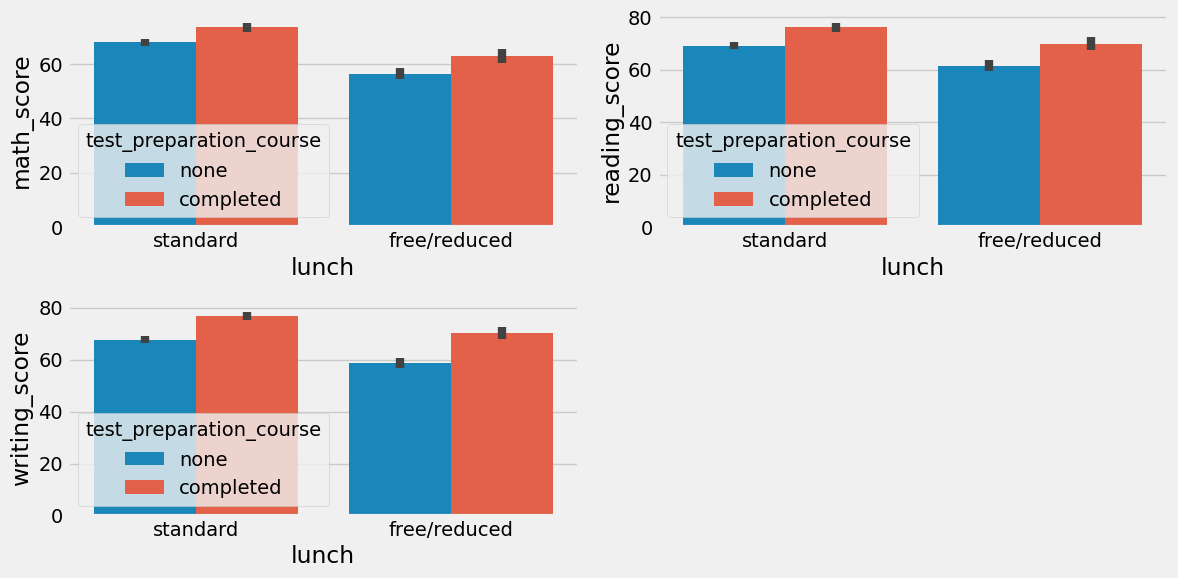

In [30]:
# Create a figure with size 12x6 for plotting
plt.figure(figsize=(12, 6))

# Create the first subplot (2 rows, 2 columns, position 1)
plt.subplot(2, 2, 1)

# Plot a barplot comparing 'lunch' vs 'math_score', grouped by 'test_preparation_course'
sns.barplot(
    x=df['lunch'],                      # Data for the x-axis (types of lunch)
    y=df['math_score'],                 # Data for the y-axis (math scores)
    hue=df['test_preparation_course']   # Color by test preparation course status
)

# Create the second subplot (2 rows, 2 columns, position 2)
plt.subplot(2, 2, 2)

# Plot a barplot comparing 'lunch' vs 'reading_score', grouped by 'test_preparation_course'
sns.barplot(
    x=df['lunch'],                      # Data for the x-axis (types of lunch)
    y=df['reading_score'],              # Data for the y-axis (reading scores)
    hue=df['test_preparation_course']   # Color by test preparation course status
)

# Create the third subplot (2 rows, 2 columns, position 3)
plt.subplot(2, 2, 3)

# Plot a barplot comparing 'lunch' vs 'writing_score', grouped by 'test_preparation_course'
sns.barplot(
    x=df['lunch'],                      # Data for the x-axis (types of lunch)
    y=df['writing_score'],              # Data for the y-axis (writing scores)
    hue=df['test_preparation_course']   # Color by test preparation course status
)

# Show the plots
plt.tight_layout()  # Adjust the spacing between subplots to avoid overlap
plt.show()


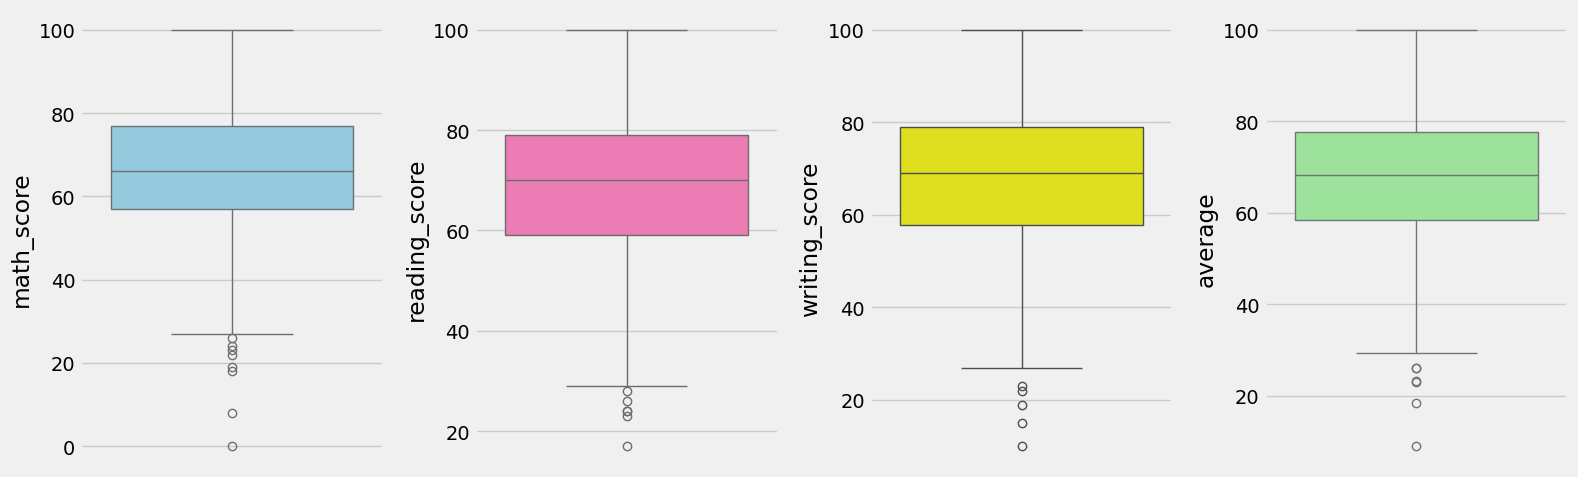

In [31]:
# Create a figure with 1 row and 4 columns of subplots, with a figure size of 16x5
plt.subplots(1, 4, figsize=(16, 5))

# Create the first subplot (1 row, 4 columns, position 1)
plt.subplot(141)

# Plot a boxplot for the 'math_score' column with a skyblue color
sns.boxplot(df['math_score'], color='skyblue')

# Create the second subplot (1 row, 4 columns, position 2)
plt.subplot(142)

# Plot a boxplot for the 'reading_score' column with a hotpink color
sns.boxplot(df['reading_score'], color='hotpink')

# Create the third subplot (1 row, 4 columns, position 3)
plt.subplot(143)

# Plot a boxplot for the 'writing_score' column with a yellow color
sns.boxplot(df['writing_score'], color='yellow')

# Create the fourth subplot (1 row, 4 columns, position 4)
plt.subplot(144)

# Plot a boxplot for the 'average' score column with a lightgreen color
sns.boxplot(df['average'], color='lightgreen')

# Display the plots
plt.tight_layout()  # Adjust the spacing between subplots to avoid overlap
plt.show()


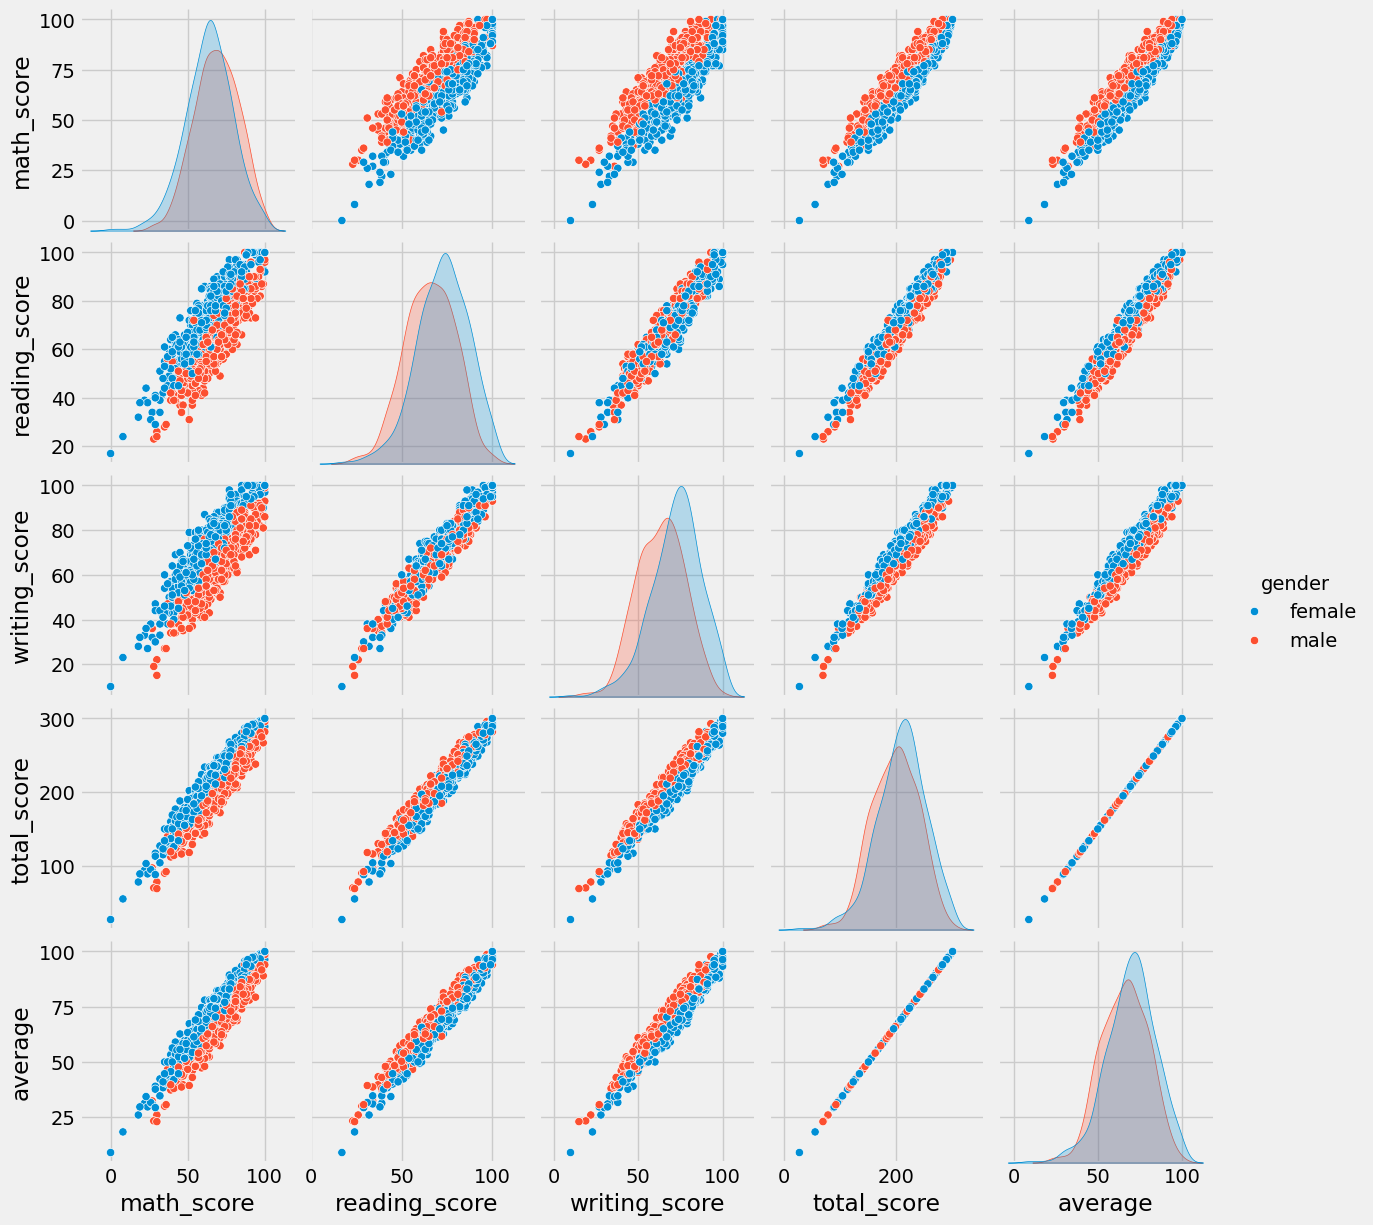

In [32]:
sns.pairplot(df,hue = 'gender')
plt.show()

In [148]:
                                                         #Thank you 